## Siamese Networks

- Siamese networks are a class of neural networks that use the same weights for multiple input branches that are joined at a final layer to make a prediction. They are mainly used in tasks that require measuring the similarity or dissimilarity between two inputs, such as image or text matching.

- The name "Siamese" comes from the famous Siamese twins Chang and Eng Bunker, who were joined at the chest and shared vital organs. Siamese networks are inspired by the twins, as they have two or more branches that are connected to a single head or tail.

- In a typical Siamese network, each input branch has its own set of layers and parameters that transform the input data into a feature vector. The feature vectors from the different branches are then concatenated and passed through a common set of fully connected layers to produce a final prediction.

- The shared weights in Siamese networks allow the model to learn a robust representation of the input data that is invariant to certain transformations, such as rotation or scaling. They are commonly used in applications such as face recognition, signature verification, and text similarity.

In [2]:
import tensorflow as tf

In [3]:
# Define the distance metric
import tensorflow.keras.backend as K

def euclidean_distance(vectors):
        vector1, vector2 = vectors
        sum_square = K.sum(K.square(vector1 - vector2), axis=1, keepdims=True)
        return K.sqrt(K.maximum(sum_square, K.epsilon()))

In [15]:
def Base_Network():

    #input
    input = tf.keras.layers.Input(shape=(224,224,3,))

    # Convolution layers'
    conv1 = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu")(input)
    maxpool1 = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv1)
    conv2 = tf.keras.layers.Conv2D(filters=256, kernel_size=(3,3), activation="relu")(maxpool1)
    maxpool2 = tf.keras.layers.MaxPool2D(pool_size=(3,3))(conv2)

    # Flatten
    flatten = tf.keras.layers.Flatten()(maxpool2)

    # Dense
    dense1 = tf.keras.layers.Dense(units=256, activation="relu")(flatten)
    output = tf.keras.layers.Dense(units=512, activation="relu")(dense1)

    return tf.keras.models.Model(inputs=input, outputs=output)

In [16]:
test_model = Base_Network()
test_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 72, 72, 256)       147712    
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 24, 24, 256)      0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 147456)            0   

In [8]:
from tensorflow.keras.utils import plot_model

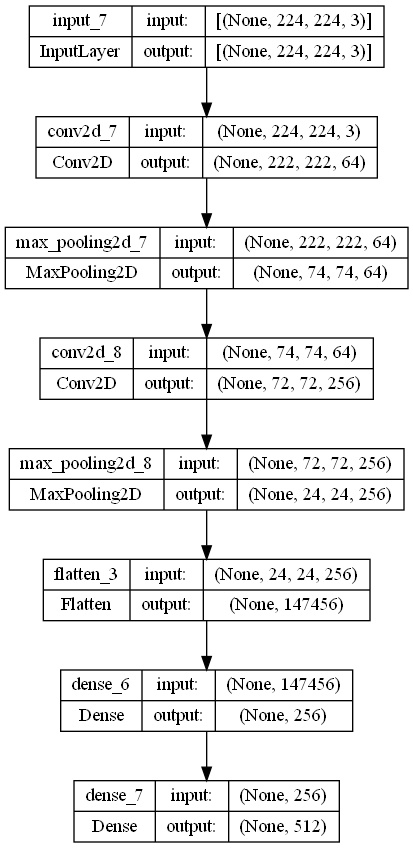

In [17]:
plot_model(test_model, show_shapes=True)

In [22]:
# Vector a
input_a = tf.keras.layers.Input(shape=(224,224,3,))
vector_a = Base_Network()(input_a)
# Vector b
input_b = tf.keras.layers.Input(shape=(224,224,3,))
vector_b = Base_Network()(input_b)

In [23]:
# Lambda Layer
s_output = tf.keras.layers.Lambda(euclidean_distance,name="output_layer")([vector_a,vector_b])

model = tf.keras.models.Model(inputs=[input_a,input_b], outputs= [s_output])

In [24]:
model.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 input_14 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 model_8 (Functional)           (None, 512)          38030080    ['input_12[0][0]']               
                                                                                           

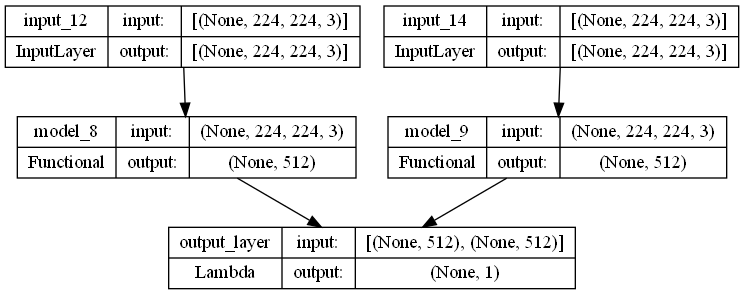

In [26]:
plot_model(model, show_shapes=True, show_layer_names=True)

# Back Propagation
Backpropagation in Siamese networks is similar to the backpropagation in standard neural networks. In Siamese networks, the two identical sub-networks share the same weights, so the backpropagation is applied to both sub-networks simultaneously.

During training, a loss function is defined to measure the similarity or dissimilarity between the pairs of inputs. The loss function is backpropagated through the network to update the shared weights of the sub-networks.

The backpropagation process in Siamese networks involves the following steps:

1. Forward pass: Each input is passed through the identical sub-networks to get the output embeddings.
2. Pairwise distance calculation: The L1 or L2 distance is calculated between the output embeddings of the two inputs to get the distance or similarity score.
3. Loss calculation: The loss function is applied to the distance or similarity score to measure the error.
4. Backward pass: The gradients of the loss function with respect to the weights are calculated and used to update the shared weights of the sub-networks.

The training process is repeated iteratively until the model converges to a satisfactory level of performance.